In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cancer-classification/cancer_classification.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/cancer-classification/cancer_classification.csv')

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.
     
<span style="color:Tomato;">From Pierian Data Inc. by Jose Marcial Portilla.</span>


# Exploratory Data Analysis

In [4]:
df.describe().T.merge(
    pd.DataFrame({'dtype': df.dtypes}), 
    left_index=True, 
    right_index=True).merge(
                            pd.DataFrame({'is_null': df.isnull().sum()}),
                                        left_index=True,
                                        right_index=True).merge(df.head().T,
                                                                left_index=True,
                                                                right_index=True)

,count,mean,std,min,25%,50%,75%,max,dtype,is_null,0,1,2,3,4
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,float64,0,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,float64,0,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,float64,0,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,float64,0,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,float64,0,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,float64,0,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,float64,0,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,float64,0,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,float64,0,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,float64,0,0.078710,0.056670,0.059990,0.097440,0.058830


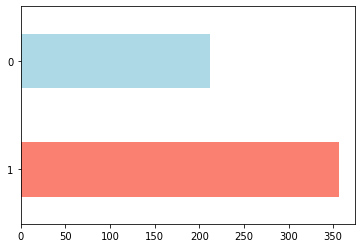

In [5]:
df['benign_0__mal_1'].value_counts().plot.barh(align='center', color=['salmon', 'lightblue']);

We have a relatively balanced dataset

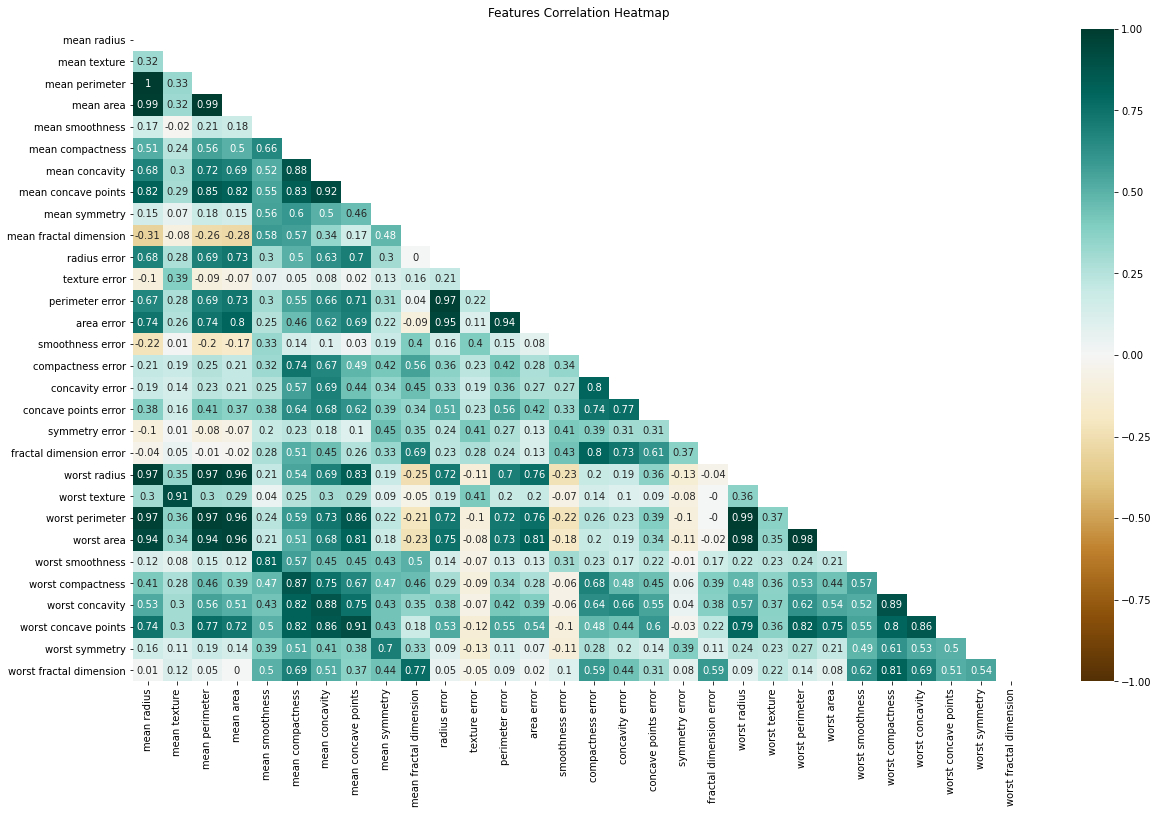

In [6]:
corr = df.drop('benign_0__mal_1', axis=1).corr().applymap(lambda x: float("{:.2f}".format(x)))
plt.figure(figsize=(20, 12))

mask = np.triu(np.ones_like(df.drop('benign_0__mal_1', axis=1).corr(), dtype=np.bool))

heatmap = sns.heatmap(corr,
                      mask=mask,
                      xticklabels=corr.columns.values,
                      yticklabels=corr.columns.values,
                      vmin=-1, 
                      vmax=1, 
                      annot=True,
                      cmap='BrBG')
heatmap.set_title('Features Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

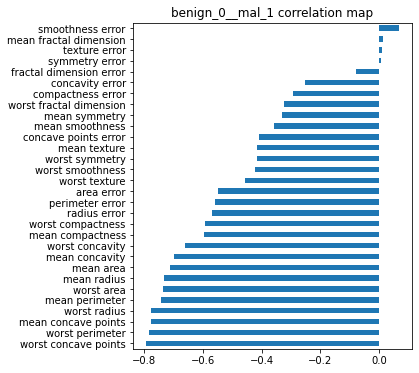

In [7]:
plt.figure(figsize=(5, 6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot.barh(title='benign_0__mal_1 correlation map');

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)
[*map(lambda x: x.shape, [X_train, X_test, y_train, y_test])]

[(426, 30), (143, 30), (426,), (143,)]

# Scaling the Data

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model
We are going to create a tensorflow keras model for binary classification using:

> optimizer: 'adam'

> loss: 'binary_crossentropy'

> metrics: 'accuracy'

In [10]:
X_train.shape

(426, 30)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=0
          )

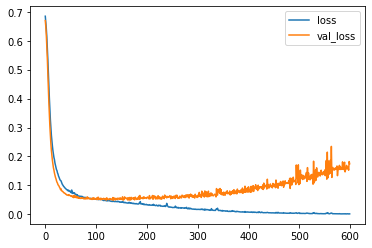

In [12]:
losses = pd.DataFrame(model.history.history)
losses.plot();

> From some point, loss start increasing for the validation data and decreasing for the train data that is an indication of overfitting (too many epochs)

# Recreating the model with callbacks to prevent overfitting

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [15]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min',
                           patience=25,
                           verbose=1)

model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=0,
          callbacks=[early_stop]
         )

Epoch 00124: early stopping


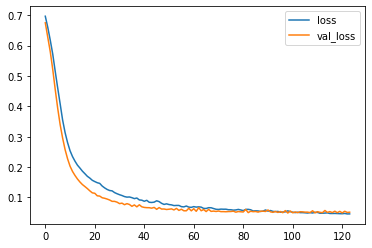

In [16]:
losses = pd.DataFrame(model.history.history).plot();
losses.plot();

# Recreating the model with Dropouts to prevent overfitting

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min',
                           patience=25,
                           verbose=1)

model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
          verbose=0, callbacks=[early_stop])

Epoch 00156: early stopping


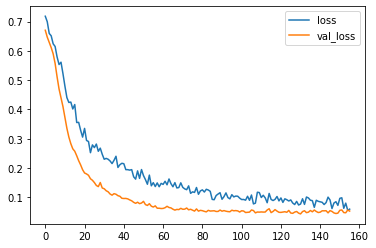

In [18]:
losses = pd.DataFrame(model.history.history).plot();
losses.plot();

In [19]:
predictions = model.predict_classes(X_test)
predictions[:5]

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [0],
       [0],
       [1],
       [1]], dtype=int32)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[53  1]
 [ 2 87]]
